In [41]:
import pandas as pd
from SALib.sample import saltelli
from SALib.analyze import sobol

data = pd.read_pickle('data1.pkl')
data2 = pd.read_pickle('dataDirk.pkl')

dat = pd.concat([data,data2])
# print(dat)

# print(data)
# print(data2)
print(dat)

problem = {
    'num_vars': 3,
    'names': ['similarity_treshold', 'social_influence', 'swingers'],
    'bounds': [[0.01,0.05], [0.01, 0.05], [1, 5]]
}
opinions = sobol.analyze(problem,calc_second_order=False, Y=dat['opinions'].as_matrix(), print_to_console=True)
radical_opinions = sobol.analyze(problem, calc_second_order=False, Y=dat['radical_opinions'].as_matrix(), print_to_console=True)
Echo_Chambers = sobol.analyze(problem, calc_second_order=False, Y=dat['Echo_Chambers'].as_matrix(), print_to_console=True)
Silent_Spiral = sobol.analyze(problem, calc_second_order=False, Y=dat['Silent_Spiral'].as_matrix(), print_to_console=True)
percentage_majority_opinion = sobol.analyze(problem, calc_second_order=False, Y=dat['percentage_majority_opinion'].as_matrix(), print_to_console=True)

     Echo_Chambers  Run  Silent_Spiral  network_type  opinions  \
0                6    0           0.29             1       NaN   
1                8    1           0.25             1       NaN   
2                5    2           0.25             1       NaN   
3                6    3           0.26             1       NaN   
4                4    4           0.23             1       NaN   
5                6    5           0.29             1       NaN   
6                4    6           0.27             1       NaN   
7                6    7           0.20             1       NaN   
8                4    8           0.23             1       NaN   
9                7    9           0.31             1       NaN   
10               4   10           0.23             1       NaN   
11              11   11           0.27             1       NaN   
12               6   12           0.22             1       NaN   
13               4   13           0.23             1       NaN   
14        

In [42]:
def plot_index(s, params, i, title=''):
    """
    Creates a plot for Sobol sensitivity analysis that shows the contributions
    of each parameter to the global sensitivity.

    Args:
        s (dict): dictionary {'S#': dict, 'S#_conf': dict} of dicts that hold
            the values for a set of parameters
        params (list): the parameters taken from s
        i (str): string that indicates what order the sensitivity is.
        title (str): title for the plot
    """

    if i == '2':
        p = len(params)
        params = list(combinations(params, 2))
        indices = s['S' + i].reshape((p ** 2))
        indices = indices[~np.isnan(indices)]
        errors = s['S' + i + '_conf'].reshape((p ** 2))
        errors = errors[~np.isnan(errors)]
    else:
        indices = s['S' + i]
        errors = s['S' + i + '_conf']
        plt.figure()

    l = len(indices)

    plt.title(title)
    plt.ylim([-0.2, len(indices) - 1 + 0.2])
    plt.yticks(range(l), params)
    plt.errorbar(indices, range(l), xerr=errors, linestyle='None', marker='o')
    plt.axvline(0, c='k')

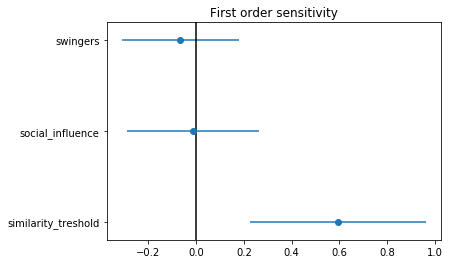

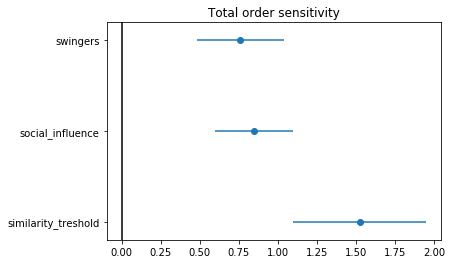

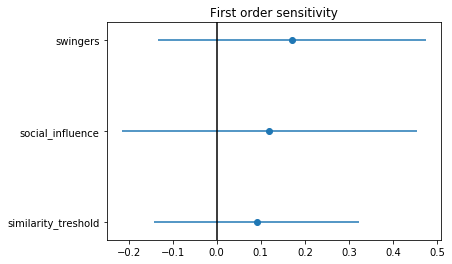

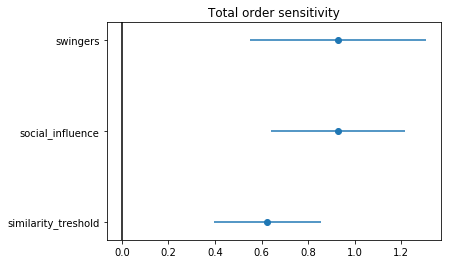

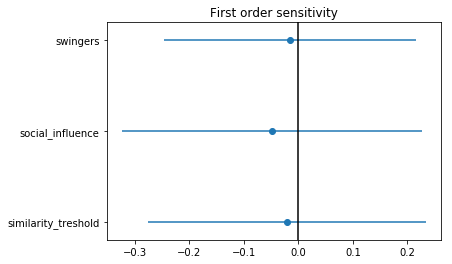

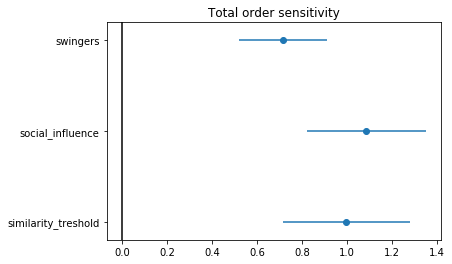

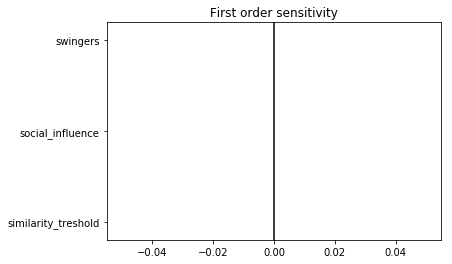

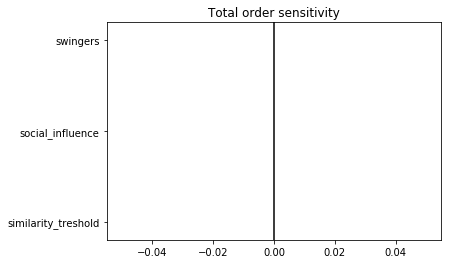

In [45]:
import matplotlib.pyplot as plt
for Si in (radical_opinions,Echo_Chambers,Silent_Spiral,percentage_majority_opinion):
    # First order
    plot_index(Si, problem['names'], '1', 'First order sensitivity')
    plt.savefig('a')
    plt.show()

    # Second order
#     plot_index(Si, problem['names'], '2', 'Second order sensitivity')
#     plt.show()

    # Total order
    plot_index(Si, problem['names'], 'T', 'Total order sensitivity')
    
    plt.show()

In [48]:
dat.to_pickle('data_Lineplots.pkl')
